<a href="https://colab.research.google.com/github/Harish-or-Peter/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Exploratory Data Analysis Starts Form Here**

In [ ]:
#Import required libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
#Extacting data 
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Global Terrorism Analysis capstone project 1/Global Terrorism Data.csv', encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### **Understanding Data**

In [ ]:
#check first 5 rows
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#check last 5 rows
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
#Rows and Columns in data
df.shape

(181691, 135)

In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#Name of all Columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

***Con: Data has 181691 rows and 135 columns***

### **Checking number of NaN values per column**

In [ ]:
#Columns wise NaN values
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
#As all the column names and all NaN sum column wise is not showing so let's make a loop to print all the values sequentially
for i, count in enumerate(df.isna().sum()):
  print(i, df.columns[i], df.isna().sum()[i])

0 eventid 0
1 iyear 0
2 imonth 0
3 iday 0
4 approxdate 172452
5 extended 0
6 resolution 179471
7 country 0
8 country_txt 0
9 region 0
10 region_txt 0
11 provstate 421
12 city 434
13 latitude 4556
14 longitude 4557
15 specificity 6
16 vicinity 0
17 location 126196
18 summary 66129
19 crit1 0
20 crit2 0
21 crit3 0
22 doubtterr 1
23 alternative 152680
24 alternative_txt 152680
25 multiple 1
26 success 0
27 suicide 0
28 attacktype1 0
29 attacktype1_txt 0
30 attacktype2 175377
31 attacktype2_txt 175377
32 attacktype3 181263
33 attacktype3_txt 181263
34 targtype1 0
35 targtype1_txt 0
36 targsubtype1 10373
37 targsubtype1_txt 10373
38 corp1 42550
39 target1 636
40 natlty1 1559
41 natlty1_txt 1559
42 targtype2 170547
43 targtype2_txt 170547
44 targsubtype2 171006
45 targsubtype2_txt 171006
46 corp2 171574
47 target2 170671
48 natlty2 170863
49 natlty2_txt 170863
50 targtype3 180515
51 targtype3_txt 180515
52 targsubtype3 180594
53 targsubtype3_txt 180594
54 corp3 180665
55 target3 180516
56 na

***Con: Data has a large number of NaN values***

### **Removing Unnecessary Columns**

In [ ]:
columns_needed=['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'targtype1_txt', 'region_txt', 'attacktype1_txt', 'success', 'extended', 'crit1',
                'crit2', 'crit3', 'suicide', 'ishostkid', 'nkill', 'dbsource', 'nhostkid']
columns_not_needed=[col for col in  list(df.columns) if col not in columns_needed]
df.drop(columns_not_needed, axis=1, inplace=True)
#columns_not_needed

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country_txt',
       'region_txt', 'crit1', 'crit2', 'crit3', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'nkill', 'ishostkid', 'nhostkid',
       'dbsource'],
      dtype='object')

## **EDA**

### **Graphical Output**

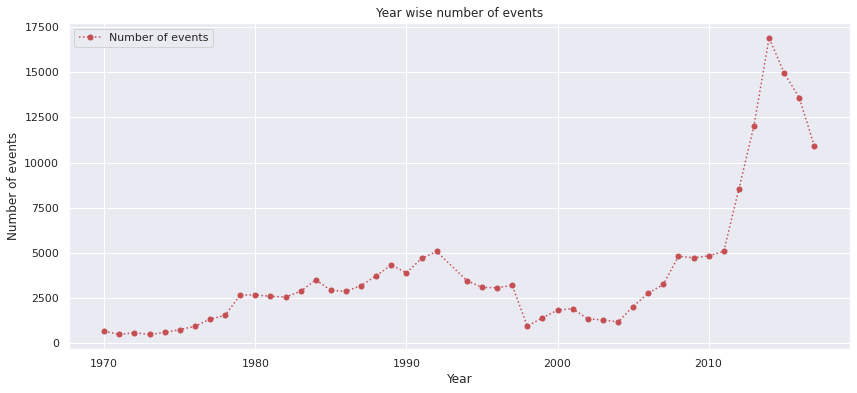

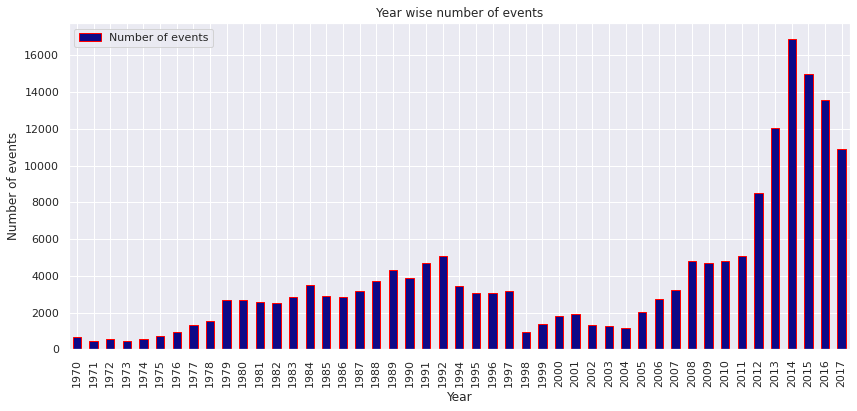

In [ ]:
df1=df.groupby(['iyear'])['eventid'].count().reset_index()
df1.rename(columns={'iyear':'year', 'eventid':'Number of events'}, inplace=True)
df1=df1.set_index('year')
df1.plot.line(figsize=(14,6), marker='.',markersize=10,title='Year wise number of events', xlabel='Year', ylabel='Number of events',style={'Number of events': '*:r'})
df1.plot.bar(figsize=(14,6), title='Year wise number of events', xlabel='Year', ylabel='Number of events', colormap='plasma', edgecolor='red')

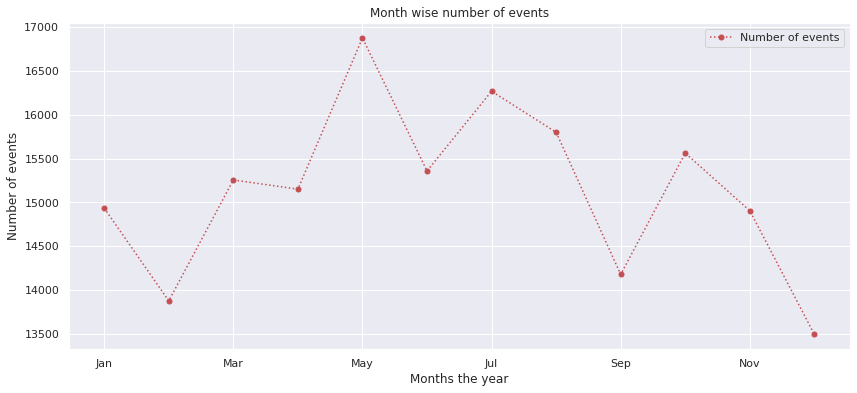

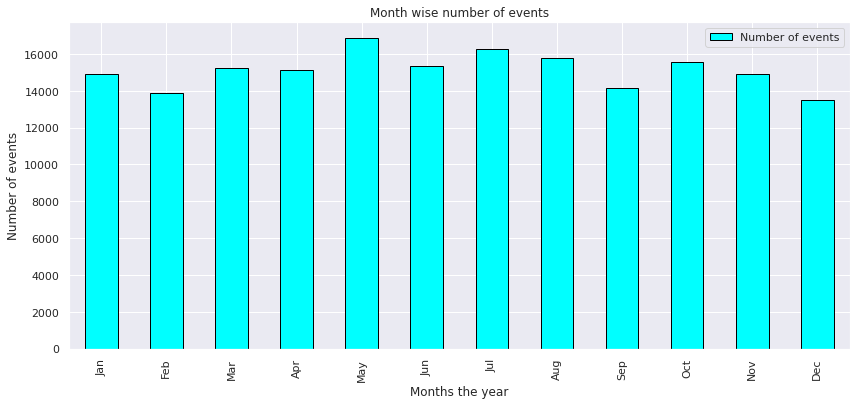

In [ ]:
df2=df.groupby(['imonth'])['eventid'].count().reset_index()
df2.rename(columns={'imonth':'Month', 'eventid':'Number of events'}, inplace=True)
df2=df2.set_index('Month')
df2.drop(0, inplace=True)
df2=df2.reset_index()
df2['Month']=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2=df2.set_index('Month')
df2.plot.line(figsize=(14,6), marker='.',markersize=10,title='Month wise number of events', xlabel='Months the year', ylabel='Number of events',style={'Number of events': '*:r'})
df2.plot.bar(figsize=(14,6), title='Month wise number of events', xlabel='Months the year', ylabel='Number of events', colormap='cool', edgecolor='black')

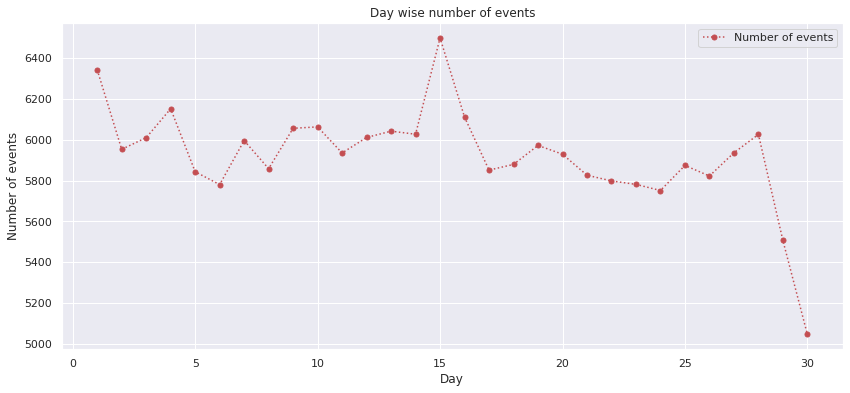

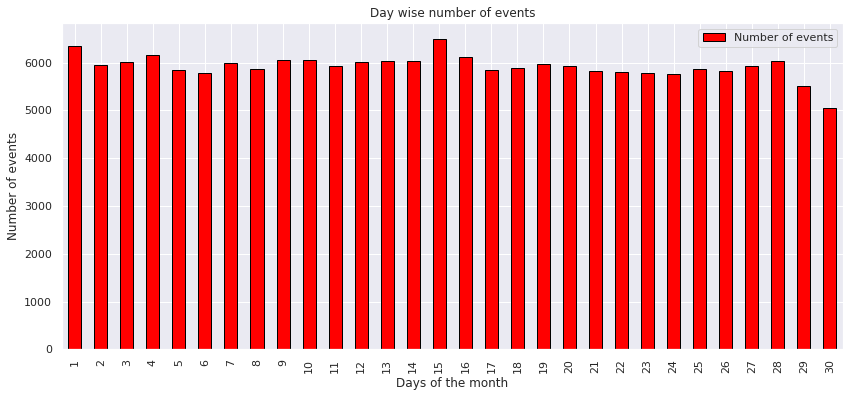

In [ ]:
df3=df.groupby(['iday'])['eventid'].count().reset_index()
df3.rename(columns={'iday':'Day', 'eventid':'Number of events'}, inplace=True)
df3=df3.set_index('Day')
df3.drop([0,31], inplace=True)
df3.plot.line(figsize=(14,6), marker='.',markersize=10,title='Day wise number of events', xlabel='Day', ylabel='Number of events',style={'Number of events': '*:r'})
df3.plot.bar(figsize=(14,6), title='Day wise number of events', xlabel='Days of the month', ylabel='Number of events', colormap='flag',  edgecolor='black')

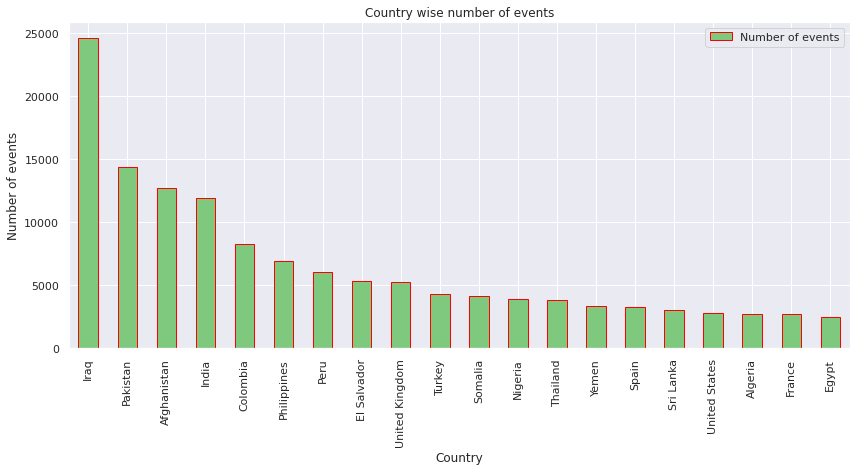

In [ ]:
df5=df.groupby(['country_txt'])['eventid'].count().reset_index()
df5=df5.sort_values('eventid' ,axis=0, ascending=False).head(20)
df5.rename(columns={'country_txt':'Country', 'eventid':'Number of events'}, inplace=True)
df5=df5.set_index('Country')
ax=df5.plot.bar(figsize=(14,6), title='Country wise number of events', xlabel='Country', ylabel='Number of events', colormap='Accent', edgecolor='red')

df5=df5.reset_index()
fig = go.Figure(data=[go.Scatter(
    x=df5['Country'], y=[x for x in range(25)],
    mode='markers',
    marker=dict(
        color=[200, 195, 190, 185, 180, 175, 170, 165, 160, 155, 150, 145, 140, 135, 130, 125, 120, 115, 110, 105],
        size=df5['Number of events']/90,),
    
    )])

fig.update_layout(
    title='Country wise number of events',
    xaxis=dict(
        title='Country',
        gridcolor='white',
        gridwidth=2,),
    yaxis=dict(
        title='Number of events',
        gridcolor='white',
        gridwidth=2,)
)
fig.show()

In [ ]:
df6=df.groupby(['region_txt'])['eventid'].count().reset_index()
df6=df6.sort_values('eventid' ,axis=0, ascending=False)
df6.rename(columns={'region_txt':'Region', 'eventid':'Number of events'}, inplace=True)
fig = go.Figure(data=[go.Scatter(
    x=df6['Region'], y=[x for x in range(25)],
    mode='markers',
    marker=dict(
        color=[105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
        size=df6['Number of events']/255,
        ))])

fig.update_layout(
    title='Region wise number of events',
    xaxis=dict(
        title='Region',
        gridcolor='white',
        gridwidth=2,),
    yaxis=dict(
        title='Number of events',
        gridcolor='white',
        gridwidth=2,)
)
fig.show()
#df6

In [ ]:
df11=df.groupby(['targtype1_txt'])['eventid'].count().reset_index()
df11.rename(columns={'targtype1_txt':'Target Type', 'eventid':'Number of Events'}, inplace=True)
df11=df11.sort_values(by='Number of Events', ascending=False)
#df11=df11.set_index('Target Type')

import plotly.express as px
#df = px.data.medals_long()

fig = px.scatter(df11, y="Number of Events", x="Target Type", text="Number of Events",
                 color=[220, 215, 210, 205, 200, 195, 190, 185, 180, 175, 170, 165, 170, 175, 180, 185, 190, 195, 210, 215, 220, 225])
fig.update_traces(marker_size=40,)
fig.update_coloraxes(showscale=False)
fig.show()

In [ ]:
df10=df.groupby(['attacktype1_txt', 'success'])['eventid'].count().reset_index()
df10.rename(columns={'attacktype1_txt':'Attack Type', 'eventid':'Number of Events'}, inplace=True)
df10=df10.set_index('Attack Type')
df10
#Import figure from excel

,success,Number of Events
Attack Type,,
Armed Assault,0,2324
Armed Assault,1,40345
Assassination,0,4697
Assassination,1,14615
Bombing/Explosion,0,10725
Bombing/Explosion,1,77530
Facility/Infrastructure Attack,0,577
Facility/Infrastructure Attack,1,9779
Hijacking,0,80


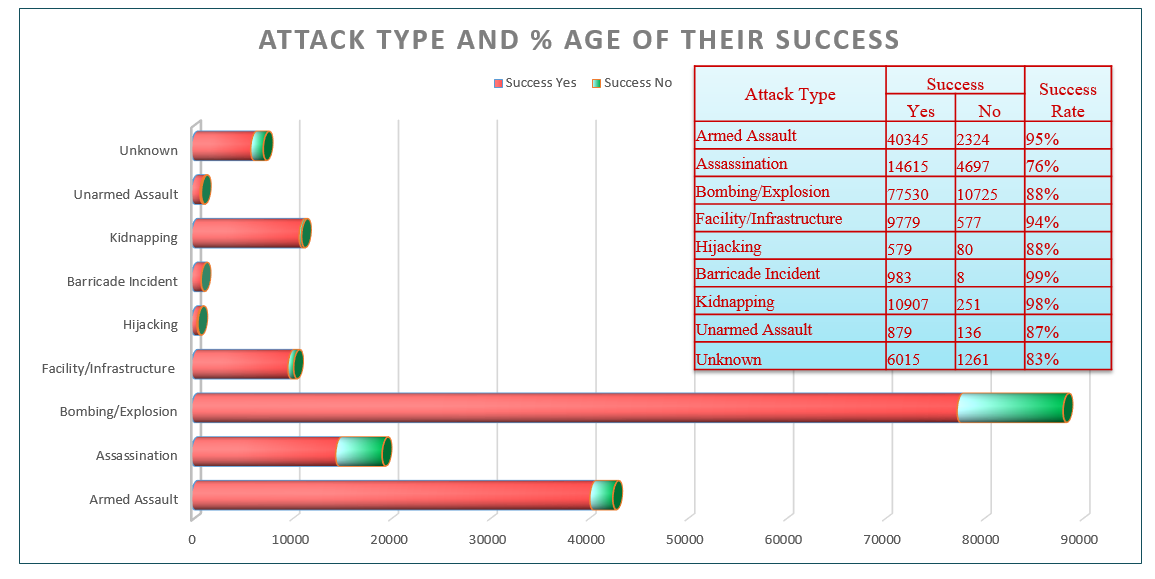

### **Yes or No Categorisation**

In [ ]:
df7_crit1=df.groupby(['crit1'])['eventid'].count().reset_index()
df7_crit1['crit1']=['No', 'Yes']
df7_crit1['Percent']=[round(x/len(df)*100,2) for x in df7_crit1['eventid']]
df7_crit1.rename(columns={'crit1':'POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL', 'eventid':'Number of events'}, inplace=True)
df7_crit1

,"POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL",Number of events,Percent
0,No,2084,1.15
1,Yes,179607,98.85


In [ ]:
df7_crit2=df.groupby(['crit2'])['eventid'].count().reset_index()
df7_crit2['crit2']=['No', 'Yes']
df7_crit2['Percent']=[round(x/len(df)*100,2) for x in df7_crit2['eventid']]
df7_crit2.rename(columns={'crit2':'NTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE', 'eventid':'Number of events'}, inplace=True)
df7_crit2

,"NTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE",Number of events,Percent
0,No,1255,0.69
1,Yes,180436,99.31


In [ ]:
df7_crit3=df.groupby(['crit3'])['eventid'].count().reset_index()
df7_crit3['crit3']=['No', 'Yes']
df7_crit3['Percent']=[round(x/len(df)*100,2) for x in df7_crit3['eventid']]
df7_crit3.rename(columns={'crit3':'OUTSIDE INTERNATIONAL HUMANITARIAN LAW', 'eventid':'Number of events'}, inplace=True)
df7_crit3

,OUTSIDE INTERNATIONAL HUMANITARIAN LAW,Number of events,Percent
0,No,22590,12.43
1,Yes,159101,87.57


In [ ]:
df8=df.groupby(['success'])['eventid'].count().reset_index()
df8['success']=['No', 'Yes']
df8['Percent']=[round(x/len(df)*100,2) for x in df8['eventid']]
df8.rename(columns={'eventid':'Number of Events'}, inplace=True)
df8

,success,Number of Events,Percent
0,No,20059,11.04
1,Yes,161632,88.96


In [ ]:
df9=df.groupby(['suicide'])['eventid'].count().reset_index()
df9['suicide']=['No', 'Yes']
df9['Percent']=[round(x/len(df)*100,2) for x in df9['eventid']]
df9.rename(columns={'suicide':'Suicide Attack',  'eventid':'Number of events'}, inplace=True)
df9

,Suicide Attack,Number of events,Percent
0,No,175058,96.35
1,Yes,6633,3.65


In [ ]:
df4=df.groupby(['extended'])['eventid'].count().reset_index()
df4['extended']=['No', 'Yes']
df4['Percent']=[round(x/len(df)*100,2) for x in df4['eventid']]
df4.rename(columns={'extended':'Duration of incident extended more than 24 hours', 'eventid':'Number of events'}, inplace=True)
df4

,Duration of incident extended more than 24 hours,Number of events,Percent
0,No,173452,95.47
1,Yes,8239,4.53


In [ ]:
df14=df.groupby(['ishostkid'])['eventid'].count().reset_index()
#removing -9.0 as it means data not available
df14=df14[df14['ishostkid']!=-9.0]    
df14['Percent']=[round(x/len(df)*100,2) for x in df14['eventid']]
df14['ishostkid']=['No', 'Yes']
df14


,ishostkid,eventid,Percent
1,No,167624,92.26
2,Yes,13572,7.47


**summarized output with figure obtained**


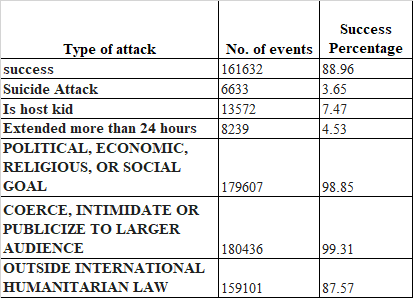




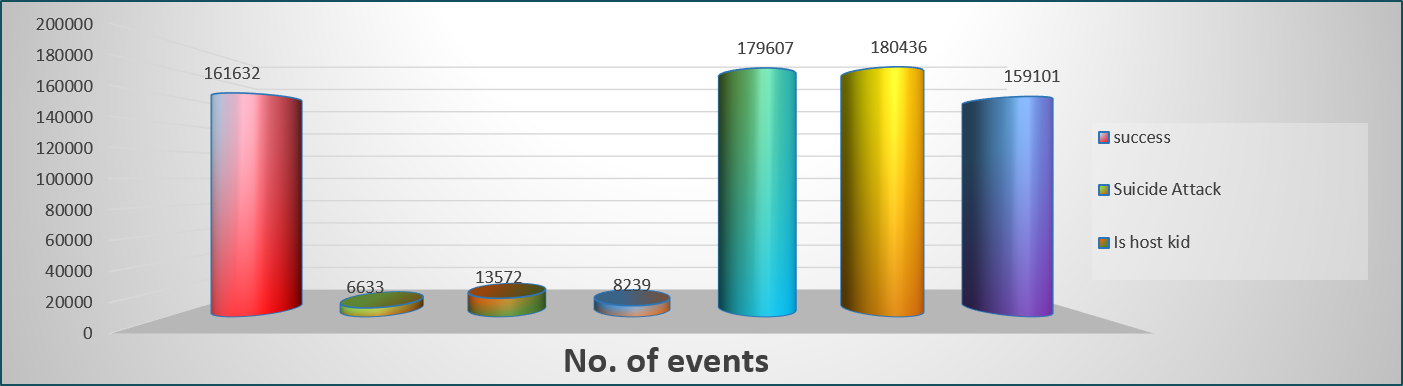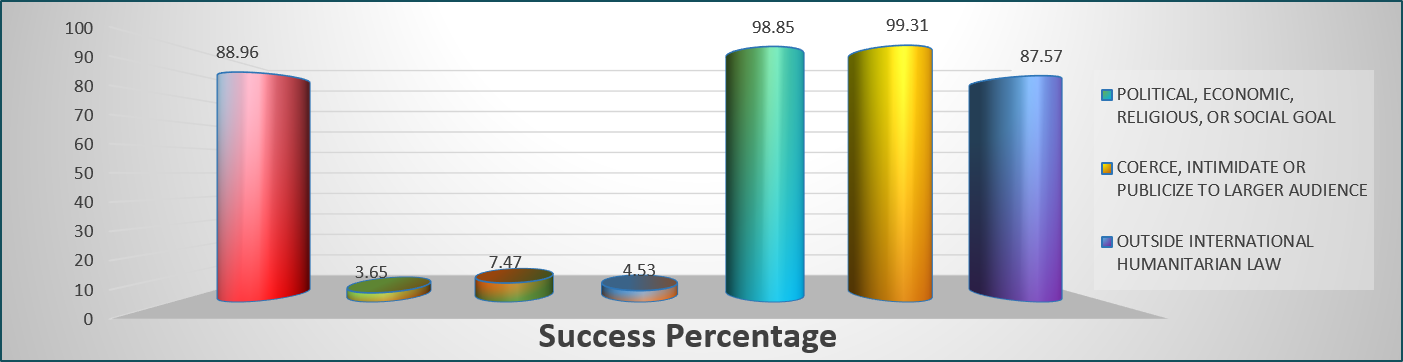

### **Top 5**

In [ ]:
df13=df.groupby(['dbsource'])['eventid'].count().reset_index()
df13.rename(columns={'dbsource':'Data base source', 'eventid':'Number of Events'}, inplace=True)
df13=df13.sort_values(by='Number of Events', ascending=False).head(5).reset_index()
fig = go.Figure(data=[go.Pie(labels=df13['Data base source'], values=df13['Number of Events'], pull=[0.05, 0.05, 0.05, 0.05])])
fig.show()
df13

,index,Data base source,Number of Events
0,14,START Primary Collection,78002
1,13,PGIS,63740
2,11,ISVG,17207
3,4,CETIS,16163
4,2,CAIN,1588


In [ ]:
df12=df.groupby(['nkill'])['eventid'].count().reset_index()
df12.rename(columns={'nkill':'Number of kills'}, inplace=True)
df12=df12.sort_values(by='Number of kills', ascending=False).head(5).reset_index()
df12.drop(['eventid', 'index'], axis=1, inplace=True)
df12=df12.reset_index()
fig = px.scatter(df12, x="index", y="Number of kills", color=df12['Number of kills'], width=500, text="Number of kills")
fig.update_traces(marker_size=40,)
fig.show()
df12


,index,Number of kills
0,0,1570.0
1,1,1384.0
2,2,1383.0
3,3,1180.0
4,4,953.0


In [ ]:
#Details of the event with maximum number of deaths
df17=df[df['nkill']==1570.0]
df17

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,crit1,crit2,crit3,success,suicide,attacktype1_txt,targtype1_txt,nkill,ishostkid,nhostkid,dbsource
133518,201406150063,2014,6,12,1,Iraq,Middle East & North Africa,1,1,0,1,0,Hostage Taking (Kidnapping),Military,1570.0,1.0,1686.0,START Primary Collection


In [ ]:
df15=df.groupby(['nhostkid'])['eventid'].count().reset_index()
df15.rename(columns={'nhostkid':'Number of host kid', 'eventid':'Number of Events'}, inplace=True)
df15=df15.sort_values(by='Number of host kid', ascending=False).head(5)
df15=df15.reset_index()
df15.drop(['index' ,'Number of Events'], axis=1, inplace=True)
df15=df15.reset_index()

fig = px.scatter(df15, x="index", y="Number of host kid", color=df15['Number of host kid'], width=500, text="Number of host kid")
fig.update_traces(marker_size=40,)
fig.show()
df15
#Put table as output

,index,Number of host kid
0,0,17000.0
1,1,10000.0
2,2,5350.0
3,3,5000.0
4,4,4000.0


In [ ]:
#Details of the event with maximum number of kid hostages
df16=df[df['nhostkid']==17000.0]
df16

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,crit1,crit2,crit3,success,suicide,attacktype1_txt,targtype1_txt,nkill,ishostkid,nhostkid,dbsource
19899,198310040004,1983,10,4,0,El Salvador,Central America & Caribbean,1,1,1,1,0,Armed Assault,Private Citizens & Property,NaN,1.0,17000.0,PGIS


***End of Analysis***